# Single Objective Optimization (SLSQP)

In [1]:
from wpaf_opt import *
import time

# ============================================================================ #
#                       Single Objective Optimization                          #
# ============================================================================ #

start_time = time.time()
args = {}
# x0 = [27.74269661,	41.77910928,	30.74200375,	7.949304467]
# args['x0'] = x0
x_init, p_init, x, soo_res_best, p_best, op_obj = wpaf_single_opt(args_in = args)

print('Execution time:', time.time() - start_time, 'seconds')

wpaf_init_obj = WPAF(x_init.nom0, x_init.name, p_init.nom_dict)
wpaf_opt_obj = WPAF(soo_res_best.x, x.name, p_best) 

#TODO: check all costs to be in 2023 $
#TODO: Update lifetime to 10 or 15 years

#print_init_result(wpaf_init_obj)
print_soo_optimize_result(wpaf_opt_obj, x.list, x.unit, soo_res_best)

Execution time: 83.97152471542358 seconds
optimization success:  True
optimal design variable:
   capture_width      63.774 [m]
   pen_diameter       43.837 [m]
   stock_density       6.568 [kg/m^3]
----------------------------------------
optimal objective function terms:
   Objective_func      9.014
   cost per yield      9.014 [$ / kg]
   NPV               272.977 [Million $]
   fish yield          2.858 [kilo Tonne]
----------------------------------------
optimal wave energy converter:
   wec number         19.929 [-]
   wec_P_ave          18.033 [kW]
   wec AEP        3150291.012 [kWh]
----------------------------------------
optimal price break down WPAF:
   WPAF NPV                       272.977 [Million $] 100.0 [%]
   |__ wec NPV                    128.562 [Million $]  47.1 [%]
   |   |__ wec CapEx              102.492 [Million $]  37.5 [%]
   |   |__ wec OpEx                26.070 [Million $]   9.6 [%]
   |__ aqua NPV                   100.351 [Million $]  36.8 [%]
   |   |_

# Plot Objective Function and Constraints (Convergence Results)

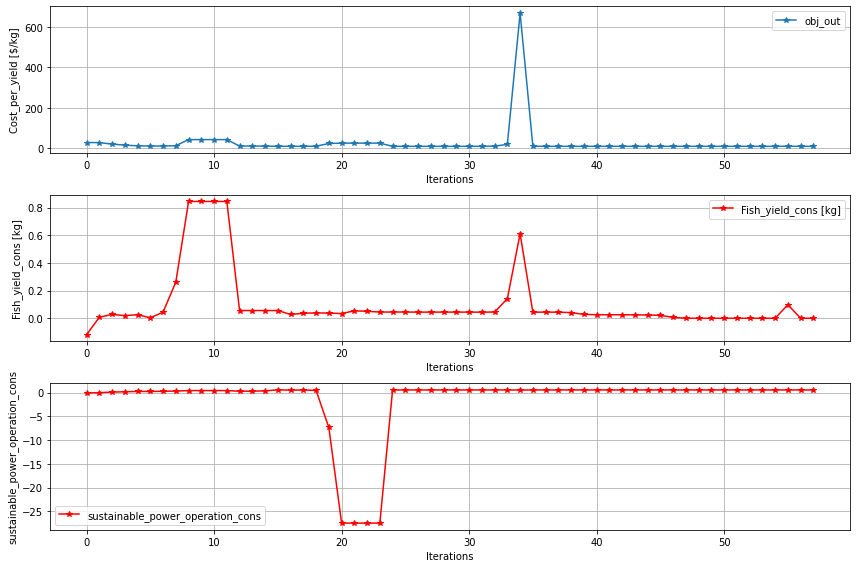

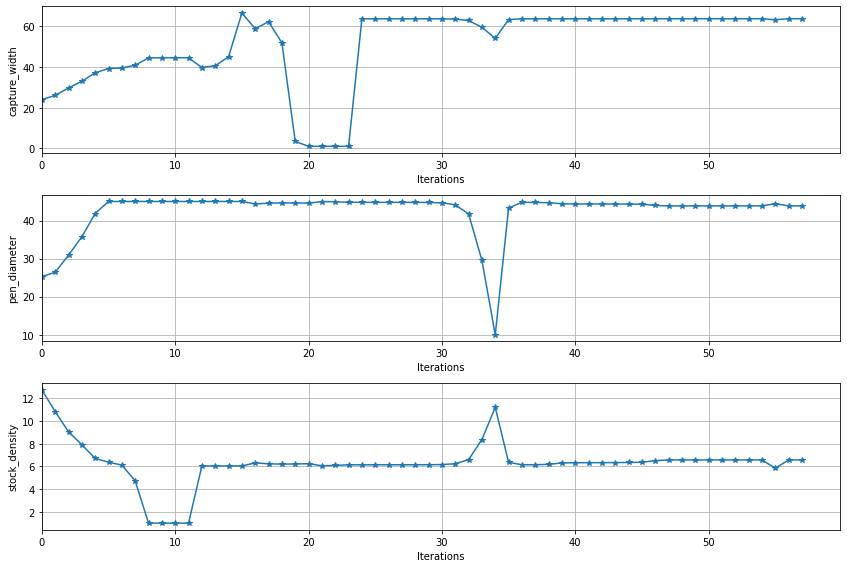

In [2]:
from matplotlib import pyplot as plt

cons_title = ['Fish_yield_cons [kg]', 'sustainable_power_operation_cons']
cons_no = len(cons_title)

fig, axes = plt.subplots(1+cons_no, 1, figsize=(12, cons_no*4))

ax0 = axes[0]
ax0.plot(op_obj.f, label='obj_out', marker='*')
ax0.set(xlabel='Iterations', ylabel='Cost_per_yield [$/kg]')
ax0.legend()
ax0.grid(True)


for i in range (cons_no):
    ax_cons = axes[i+1]
    ax_cons.plot(op_obj.ineq[:, i], 'r', label=cons_title[i], marker='*')
    ax_cons.set(xlabel='Iterations', ylabel=cons_title[i]);
    ax_cons.legend()
    ax_cons.grid(True)

plt.tight_layout()
plt.show()

#fig for design var
fig_x, ax_x = plt.subplots(len(x.list),1, figsize=(12, 8))
for ii in range(len(x.list)):
    ax_x[ii] = plt.subplot(len(x.list),1,ii+1)
for i in range(len(x.list)):
    ax_x[i].plot(op_obj.x_history[:, i], marker='*')
    ax_x[i].set(xlabel='Iterations', ylabel=x.list[i])
    ax_x[i].grid(True)
    ax_x[i].set_xlim(0, None)
    #ax_x[i].set_ylim(5, 85)
    ax_x[i].ticklabel_format(useOffset=False, style='plain', axis='y')
plt.tight_layout()
plt.show()

# Plot power

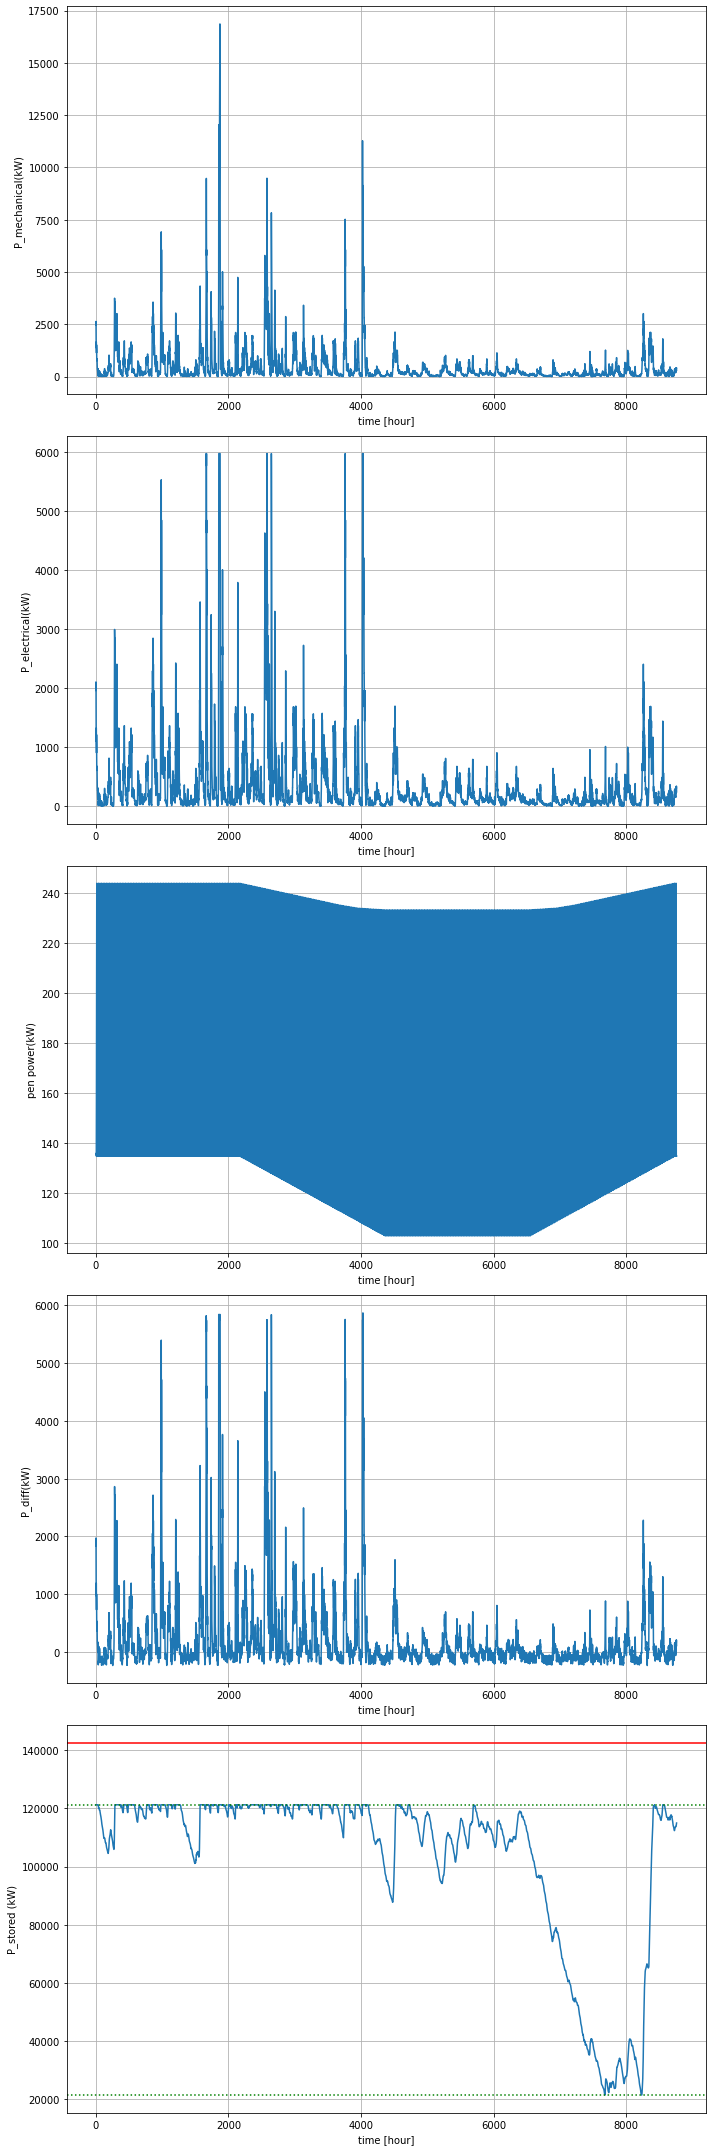

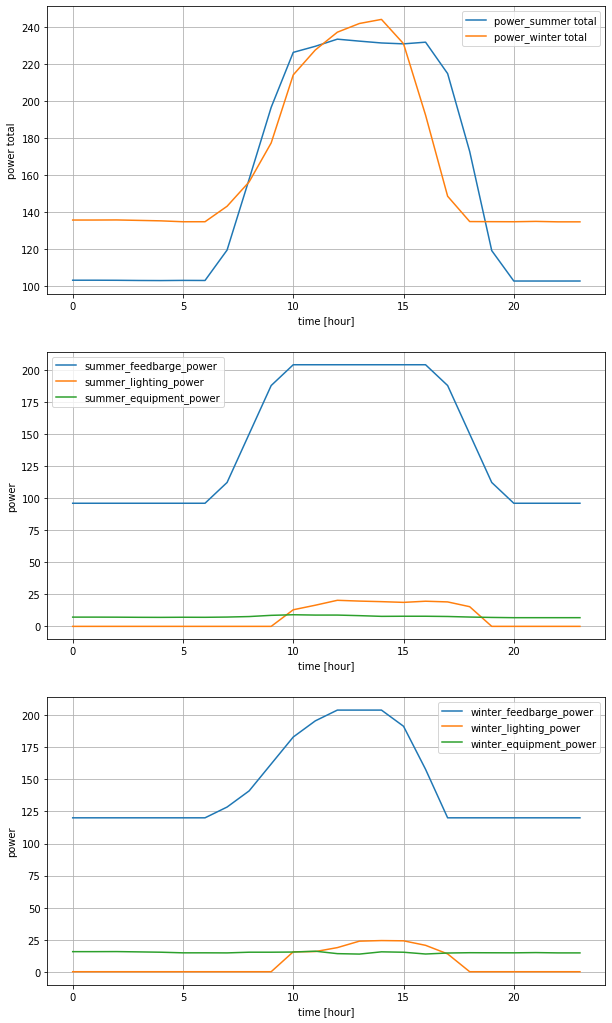

In [3]:
wpaf_opt_obj.plot_power()

# Plot fish growth and fish oxygen demand

DO2 for 1kg fish 504.2788423858458
DO2 for 2kg fish 1174.7045514567676
DO2 for 3kg fish 1885.5099944513904
DO2 for 4kg fish 2592.876196676822
fish weight after 365 days 4216.750932751627


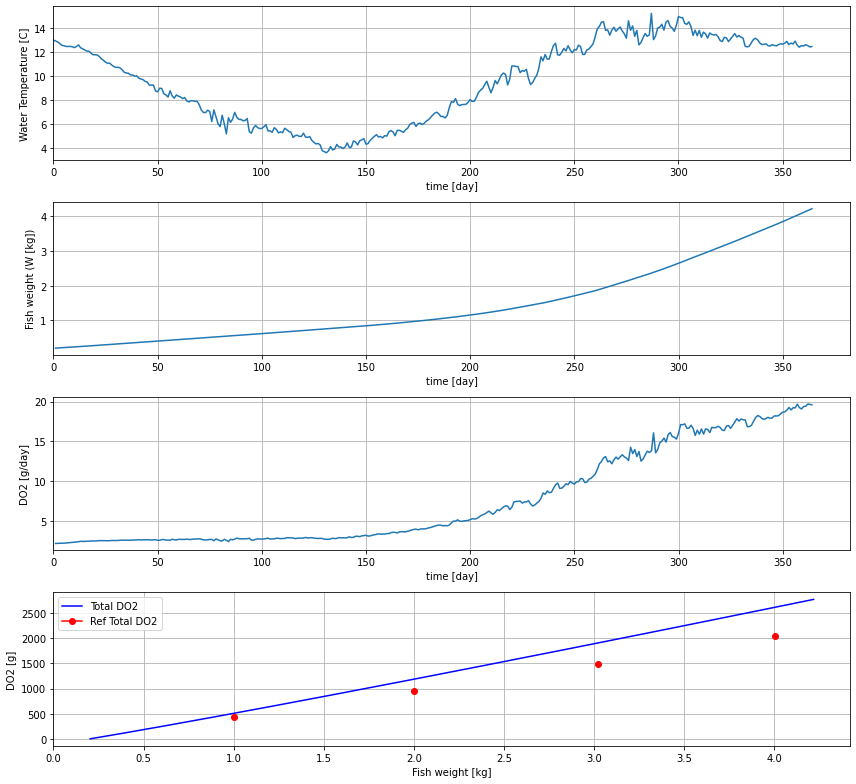

In [4]:
wpaf_opt_obj.plot_variable()

# Single Objective Optimization (NSGA2)

In [5]:
from wpaf_opt import *

start_time = time.time()
args = {}
args['moo_n_obj'] = 1
x, moo_res_best, p_best, op_obj = wpaf_multi_opt(args_in = args)

print('Execution time:', (time.time() - start_time)/60, 'minutes')

try:
    wpaf_opt_obj = WPAF(moo_res_best.X, x.name, p_best) 
except:
    wpaf_opt_obj = WPAF(moo_res_best.X[0], x.name, p_best) 
print_moo_optimize_result(wpaf_opt_obj, x.list, x.unit, moo_res_best)

Execution time: 106.83734961350758 minutes
optimization success: True
optimal design variable:
   capture_width      66.987 [m]
   pen_diameter       44.997 [m]
   stock_density       6.350 [kg/m^3]
----------------------------------------
optimal objective function terms:
   Objective_func      9.009
   cost per yield      9.009 [$ / kg]
   NPV               286.566 [Million $]
   fish yield          3.003 [kilo Tonne]
----------------------------------------
optimal wave energy converter:
   wec number         20.933 [-]
   wec_P_ave          18.033 [kW]
   wec AEP        3309020.200 [kWh]
----------------------------------------
optimal price break down WPAF:
   WPAF NPV                       286.566 [Million $] 100.0 [%]
   |__ wec NPV                    135.040 [Million $]  47.1 [%]
   |   |__ wec CapEx              107.657 [Million $]  37.6 [%]
   |   |__ wec OpEx                27.383 [Million $]   9.6 [%]
   |__ aqua NPV                   105.242 [Million $]  36.7 [%]
   |   |_